# Tuning of hyperparameters <br>

In [1]:
'''
# Using below
# Reading files
base_path = 'hdfs:/user/bm106/pub/MSD/'
train_file = base_path + 'cf_train.parquet'
validation_file = base_path + 'cf_validation.parquet' 
test_file = base_path + 'cf_test.parquet'
   
# Get dataframes
train_df, validation_df, test_df = readData(train_file, validation_file, test_file)
    
# Sample down data by number of users
train_df = sampleByUser(train_df, validation_df, 0.4)
    
# Convert IDs from Alphanumeric to Numeric
train_df, validation_df, test_df = preprocess(train_df, validation_df, test_df)
    
params = { 'rank': [10, 15, 20], 'regParam' : [0.1, 0.5, 1], 'alpha' : [1, 5, 10] }
tune_model(train_df, validation_df, params)
'''

"\n# Using below\n# Reading files\nbase_path = 'hdfs:/user/bm106/pub/MSD/'\ntrain_file = base_path + 'cf_train.parquet'\nvalidation_file = base_path + 'cf_validation.parquet' \ntest_file = base_path + 'cf_test.parquet'\n   \n# Get dataframes\ntrain_df, validation_df, test_df = readData(train_file, validation_file, test_file)\n    \n# Sample down data by number of users\ntrain_df = sampleByUser(train_df, validation_df, 0.1)\n    \n# Convert IDs from Alphanumeric to Numeric\ntrain_df, validation_df, test_df = preprocess(train_df, validation_df, test_df)\n    \nparams = { 'rank': [10, 15, 20], 'regParam' : [0.1, 0.5, 1], 'alpha' : [1, 5, 10] }\ntune_model(train_df, validation_df, params)\n"


## Results obtained: <br>


(10, 0.1, 1)  => Mean Average Precision is 0.024370152040614237, Precision at k = 500 is 0.00588<br>
(10, 0.1, 5)  => Mean Average Precision is 0.018283625695995405, Precision at k = 500 is 0.00626<br>
(10, 0.1, 10) => Mean Average Precision is 0.015822614990502686, Precision at k = 500 is 0.006259999999999999<br>
(10, 0.5, 1)  => Mean Average Precision is 0.017544202018161946, Precision at k = 500 is 0.006219999999999998<br>
(10, 0.5, 5)  => Mean Average Precision is 0.02534940077848496, Precision at k = 500 is 0.006639999999999999<br> 
(10, 0.5, 10) => Mean Average Precision is 0.02932470843714892, Precision at k = 500 is 0.006460000000000002<br>
(10, 1, 1)    => Mean Average Precision is 0.01352145334886921, Precision at k = 500 is 0.00538<br>
(10, 1, 5)    => Mean Average Precision is 0.030513662550964063, Precision at k = 500 is 0.00838<br>
(10, 1, 10)=> Mean Average Precision is 0.03126247852113753, Precision at k = 500 is 0.006939999999999999<br>
(15, 0.1, 1)=>Mean Average Precision is 0.026608360982140734, Precision at k = 500 is 0.007520000000000004<br>
(15, 0.1, 5)=> Mean Average Precision is 0.03679347965349068, Precision at k = 500 is 0.007919999999999998<br>
(15, 0.1, 10) => Mean Average Precision is 0.017638685590062726, Precision at k = 500 is 0.00672<br>
(15, 0.5, 1) =>Mean Average Precision is 0.027109779129422893, Precision at k = 500 is 0.00618<br>
(15, 0.5, 5) => Mean Average Precision is 0.02043785040864091, Precision at k = 500 is 0.008320000000000001<br>
(15, 0.5, 10)=> Mean Average Precision is 0.030557510466601163, Precision at k = 500 is 0.007260000000000002<br>
(15, 1, 1) => Mean Average Precision is 0.016995728932815653, Precision at k = 500 is 0.00582<br>
(15, 1, 5) => Mean Average Precision is 0.02571221060582168, Precision at k = 500 is 0.00714<br>
(15, 1, 10) => Mean Average Precision is 0.028746327492748084, Precision at k = 500 is 0.007940000000000003<br>
(20, 0.1, 1)=>Mean Average Precision is 0.021693272785472156, Precision at k = 500 is 0.0065<br>
(20, 0.1, 5)=> Mean Average Precision is 0.021882349596147956, Precision at k = 500 is 0.007360000000000001<br>
(20, 0.1, 10)=> Mean Average Precision is 0.037472788688377126, Precision at k = 500 is 0.007899999999999999<br>
(20, 0.5, 1)=> Mean Average Precision is 0.03466062211007827, Precision at k = 500 is 0.007259999999999998<br>
(20, 0.5, 5)=>Mean Average Precision is 0.02444046967062091, Precision at k = 500 is 0.007400000000000001<br>
(20, 0.5, 10)=> Mean Average Precision is 0.028395157783798922, Precision at k = 500 is 0.006959999999999998<br>
(20, 1, 1)=> Mean Average Precision is 0.03253082524170485, Precision at k = 500 is 0.00682<br>
(20, 1, 5)=> Mean Average Precision is 0.036203393911766246, Precision at k = 500 is 0.00824<br>
(20, 1, 10)=> Mean Average Precision is 0.022048835360582913, Precision at k = 500 is 0.0068400000000000015<br>


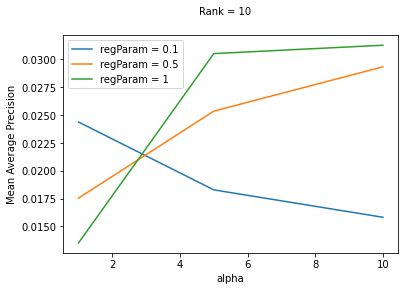

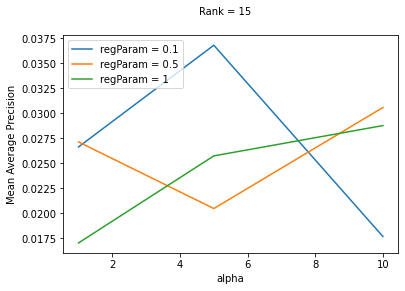

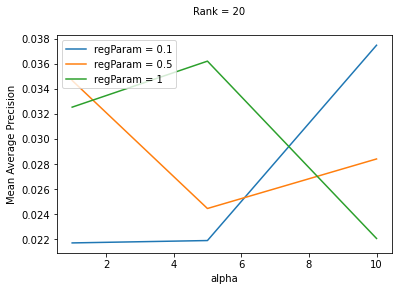

In [1]:
import matplotlib.pyplot as plt

hyperparams = { 'rank': [10, 15, 20], 'regParam' : [0.1, 0.5, 1], 'alpha' : [1, 5, 10] }

# Building graph for mAP
# For rank = 10
plt.plot(hyperparams['alpha'], [0.024370152040614237, 0.018283625695995405, 0.015822614990502686], label="regParam = 0.1")
plt.plot(hyperparams['alpha'], [0.017544202018161946, 0.02534940077848496, 0.02932470843714892], label="regParam = 0.5")
plt.plot(hyperparams['alpha'], [0.01352145334886921, 0.030513662550964063, 0.03126247852113753], label="regParam = 1")
plt.xlabel('alpha')
plt.ylabel('Mean Average Precision')
plt.legend(loc="upper left")
plt.suptitle('Rank = 10', fontsize=10)
plt.show()

# For rank = 15
plt.plot(hyperparams['alpha'], [0.026608360982140734, 0.03679347965349068, 0.017638685590062726], label="regParam = 0.1")
plt.plot(hyperparams['alpha'], [0.027109779129422893, 0.02043785040864091, 0.030557510466601163], label="regParam = 0.5")
plt.plot(hyperparams['alpha'], [0.016995728932815653, 0.02571221060582168, 0.028746327492748084], label="regParam = 1")
plt.xlabel('alpha')
plt.ylabel('Mean Average Precision')
plt.legend(loc="upper left")
plt.suptitle('Rank = 15', fontsize=10)
plt.show()

# For rank = 20
plt.plot(hyperparams['alpha'], [0.021693272785472156, 0.021882349596147956, 0.037472788688377126], label="regParam = 0.1")
plt.plot(hyperparams['alpha'], [0.03466062211007827, 0.02444046967062091, 0.028395157783798922], label="regParam = 0.5")
plt.plot(hyperparams['alpha'], [0.03253082524170485, 0.036203393911766246, 0.022048835360582913], label="regParam = 1")
plt.xlabel('alpha')
plt.ylabel('Mean Average Precision')
plt.legend(loc="upper left")
plt.suptitle('Rank = 20', fontsize=10)
plt.show()


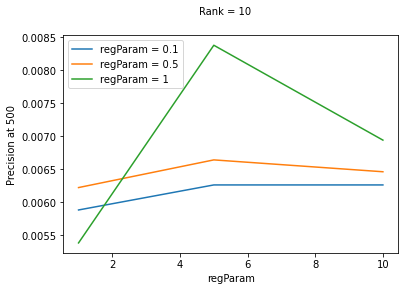

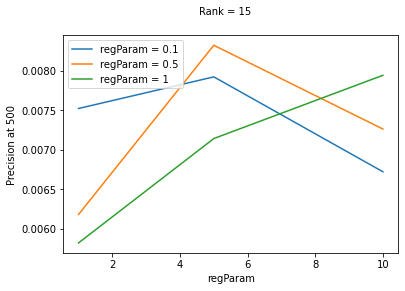

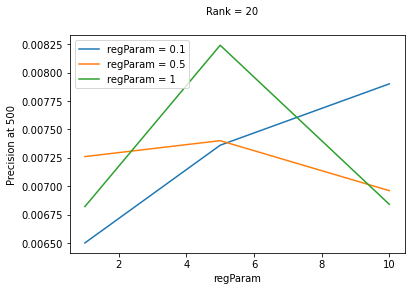

In [9]:
# Building graph for precision at 500
# For rank = 10
plt.plot(hyperparams['alpha'], [0.00588, 0.00626, 0.006259999999999999], label="regParam = 0.1")
plt.plot(hyperparams['alpha'], [0.006219999999999998, 0.006639999999999999, 0.006460000000000002], label="regParam = 0.5")
plt.plot(hyperparams['alpha'], [0.00538, 0.00838, 0.006939999999999999], label="regParam = 1")
plt.xlabel('regParam')
plt.ylabel('Precision at 500')
plt.legend(loc="upper left")
plt.suptitle('Rank = 10', fontsize=10)
plt.show()

# For rank = 15
plt.plot(hyperparams['alpha'], [0.007520000000000004, 0.007919999999999998, 0.00672], label="regParam = 0.1")
plt.plot(hyperparams['alpha'], [0.00618, 0.008320000000000001, 0.007260000000000002], label="regParam = 0.5")
plt.plot(hyperparams['alpha'], [0.00582, 0.00714, 0.007940000000000003], label="regParam = 1")
plt.xlabel('regParam')
plt.ylabel('Precision at 500')
plt.legend(loc="upper left")
plt.suptitle('Rank = 15', fontsize=10)
plt.show()

# For rank = 20
plt.plot(hyperparams['alpha'], [0.0065, 0.007360000000000001, 0.007899999999999999], label="regParam = 0.1")
plt.plot(hyperparams['alpha'], [0.007259999999999998, 0.007400000000000001, 0.006959999999999998], label="regParam = 0.5")
plt.plot(hyperparams['alpha'], [0.00682, 0.00824, 0.0068400000000000015], label="regParam = 1")
plt.xlabel('regParam')
plt.ylabel('Precision at 500')
plt.legend(loc="upper left")
plt.suptitle('Rank = 20', fontsize=10)
plt.show()

### The best result for mAP achieved for Rank = 20, regParam = 0.1, alpha = 10